# Corporación Favorita Grocery Sales Forecasting

Authors: shiying Chen, Jianjun Du,  Bo Huang, Yanyan Zhu, 

Features: big data, 120 million records; time series; regressions; clusering

Part I: data preprocess, descriptive data analysis, feature engineering

Part II: model selection, tuning, and evaluation

## part I: data preprocess, descriptive data analysis, feature engineer

### 1.1 data input and preprocess

In [1]:
#  Corporación Favorita Grocery Sales Forecasting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# read in data, and made some modification to make them smaller
# reference: https://www.kaggle.com/heyt0ny/read-data-for-low-memory-usage
def loaddata(filename):
    types = {'id': 'int64',
             'item_nbr': 'int32',
             'store_nbr': 'int16',
             'unit_sales': 'float32',
             'onpromotion': bool,
    }
    data = pd.read_csv(filename, dtype=types)
    data['onpromotion'].fillna(False, inplace = True)
    data['onpromotion'] = data['onpromotion'].map({False : 0, True : 1})
    data['onpromotion'] = data['onpromotion'].astype('int8')
    return data

train=loaddata("train.csv")

In [16]:
# detach the date column to year (2013, 2014,..), day of the week(monday,tuesday,..), month(january, February, et..)
DateIndex=pd.DatetimeIndex(train['date'])
train['year']=DateIndex.year
train['month']=DateIndex.month
train['dayofweek']=DateIndex.weekday

In [6]:
stores=pd.read_csv("stores.csv")
holidays=pd.read_csv("holidays_events.csv")
items=pd.read_csv("items.csv")
oilprice=pd.read_csv("oil.csv")
transactions=pd.read_csv("transactions.csv")

### 1.2 descriptive data analysis

In [26]:
# How many items are sold by the company?
train.item_nbr.nunique()


4036

In [25]:
# How many stores owned by the company?
train.store_nbr.nunique()

54

### 1.3 feature selection and engineering

In [ ]:
# There are more than 120 million records, only one year data will be used, because it is too big for a 32G RAM computer
data=train.iloc[-37500000:,:]
data.to_csv("traindata.csv",index=False)
# load the other files
data=pd.read_csv("traindata.csv")

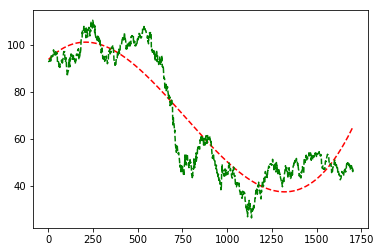

In [7]:
# polynomial fit of oil price trending with days
tmp1=pd.DatetimeIndex(oilprice['date'])
tmp2=tmp1-tmp1.min()
oilprice['days']=tmp2.astype('timedelta64[D]')
oilprice.dropna(inplace=True)
model=np.polyfit(oilprice['days'].values,oilprice['dcoilwtico'].values,3)
fit=np.poly1d(model)
oilprice['predicted_price']=oilprice['days'].apply(lambda x: fit(x))
plt.plot(oilprice['days'],oilprice['predicted_price'],'r--',oilprice['days'],oilprice['dcoilwtico'],'g--')
plt.show()


In [8]:
# detach the date column to the days from the beginning of the day, which was 2013-1-1
data['days']=(DateIndex-DateIndex.min()).astype('timedelta64[D]')

# fit the oil price model to the whole dataset
data['oilprice']=data['days'].apply(lambda x: fit(x))